In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def de(fobj, bounds, mut=0.8, crossp=0.7, popsize=20, its=1000):
    dimensions = len(bounds)
    pop = np.random.rand(popsize, dimensions)
    min_b, max_b = np.asarray(bounds).T
    diff = np.fabs(max_b - min_b)
    pop_denorm = min_b + pop*diff
    fitness = np.asarray([fobj(ind) for ind in pop_denorm])
    best_idx = np.argmin(fitness)
    best = pop_denorm[best_idx]

    for i in range(its):
        for j in range(popsize):
            target = pop[j]
            idxs = [idx for idx in range(popsize) if idx != j]
            selected = np.random.choice(idxs, 3, replace=False)
            a, b, c = pop[selected]
            mutant = np.clip(a + mut*(b-c), 0, 1)    
            cross_points = np.random.rand(dimensions) < crossp
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimensions)] = True
            trial = np.where(cross_points, mutant, pop[j])
            trial_denorm = min_b + trial*diff
            f = fobj(trial_denorm)
            if f < fitness[j]:
                fitness[j] = f
                pop[j] = trial
                if f < fitness[best_idx]:
                    best_idx = j
                    best = trial_denorm
        yield best, fitness[best_idx]

In [18]:
data = np.asarray(pd.read_csv('2ndorder autocorrelation without compressor-1.txt', sep='\t', header=None))

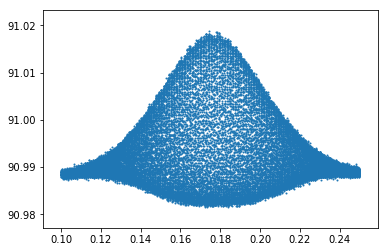

In [34]:
x = data[:,0]
y = data[:,1]
plt.scatter(x, y, s=1)
plt.show()

In [71]:
def fmodel(x, w):
    a, b, c, d, e, f = w
    z = a*(1 + np.exp(-4*np.log(2)*((x-b)/c)**2) + 4*np.exp(-3*np.log(2)*((x-b)/c)**2)*np.cos(d*x+e) + 2*np.exp(-4*np.log(2)*((x-b)/c)**2)*np.cos(d*x+e)**2) + f
    return z

def rmse(w):
    y_pred = fmodel(x, w)
    return np.sqrt(sum((y - y_pred)**2)) / len(y)

In [87]:
bounds = [(0.1,10), (1,100), (0.1,100), (4800000,5200000), (0.1,100), (80,100)]

In [ ]:
result = list(de(rmse, bounds, its=10000))
result[-1]

In [ ]:
plt.scatter(x, y, s=1, label='Actual')
plt.scatter(x, fmodel(x, result[-1][0]), s=1, label='Fitted')
plt.legend()
plt.show()